This shows how to analyse the results of a boundary search done in the cluster, assuming that the formatting follows the example in the folder parallelsearch.

In [4]:
import sys
sys.path.append('../utilsGRF')
import AnalyseBoundarysearch

folder to check ./parallelsearch/tocheck
no jid_num, timediff and converged unknown.
folder to check with mathematica is ./parallelsearch/tocheck
(281, 201)


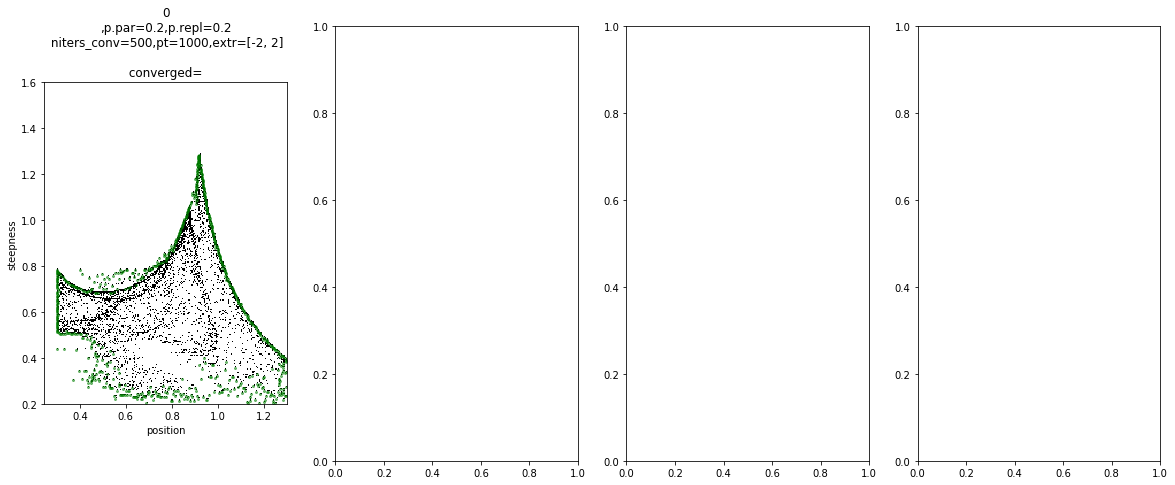

In [5]:
args={'njobs':1,
      'final':True, 
      'printtocheck':True, 
      'fldr':'./parallelsearch',
      'basename':'poln5',
    'joinmats':True,
      'jid_num':None, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness'}
out=AnalyseBoundarysearch.plot_boundaries_search(**args)

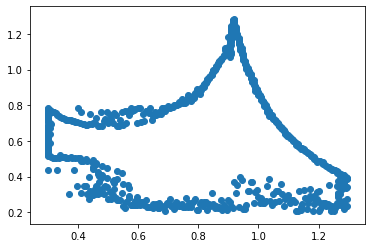

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(out[1]['col'],out[1]['row'])

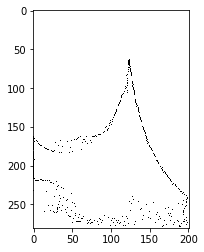

In [8]:
plt.imshow(out[0][::-1],cmap=plt.cm.Greys)

Below is some template code in case one wants to extend the search on a different grid (notice that the size of the grid cells has to be fixed.)

In [ ]:
mat=
mat_pars=
newmatname=
newmatparsname=newmatname.replace('seedmat_','seedmatpars')
left=
right=
lowery=
uppery=
npars=len(mat_pars[0,0])
ridx=np.where(row_ar>=lowery)[0][0]
if uppery<row_ar[-1]:
    ridxup=np.where(row_ar<=uppery)[0][-1] #or None if I want to explore a broader range that the one explored in the previous 
    print(ridx,stp_ar[ridx:ridxup])
else:
    ridxup=None
    

plt.imshow(mat[ridx:],origin='lower')
plt.show()

new_row_ar=np.arange(row_ar[ridx],uppery,stp_ar[1]-stp_ar[0])
print(new_stp_ar)


new_mat=np.zeros((len(new_row_ar),len(col_ar)))
new_mat_pars=np.zeros((len(new_row_ar),len(col_ar),npars))
if ridxup is None:
    new_mat[0:len(mat[ridx:])]=mat[ridx:]
    new_mat_pars[0:len(mat[ridx:])]=mat_pars[ridx:]
else:
    new_mat[0:len(mat[ridx:ridxup])]=mat[ridx:ridxup]
    new_mat_pars[0:len(mat[ridx:ridxup])]=mat_pars[ridx:ridxup]
    
plt.imshow(new_mat,origin='lower',extent=[pos_ar[0],pos_ar[-1],new_stp_ar[0],new_stp_ar[-1]])
plt.show()


#It may be appropriate to fill to the left and to the bottom so that it will not search here:
#l
#for row in range(len(mat[ridx:])):
#    if new_row_ar[row]<1.28:
#        new_mat[row,0]=1
for col in range(leftlowerbound,len(col_ar)):
    if col_ar[col]<rightlowerbound:
        if new_mat[0,col]<1:
            new_mat[0,col]=1
plt.imshow(new_mat,origin='lower',extent=[pos_ar[0],pos_ar[-1],new_stp_ar[0],new_stp_ar[-1]])
#plt.ylim(1.2,1.4)
plt.show()

np.save(newmatname,new_mat)
np.save(newmatparsname,new_mat_pars)